The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

The gender with the most Nobel Prize winners is:  Male
The most common birth country of Nobel Prize winners is:  United States of America
The first woman to win a Nobel Prize was  Marie Curie, née Sklodowska
She won in the category of  Physics
The repeat Nobel Prize winners are:  ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


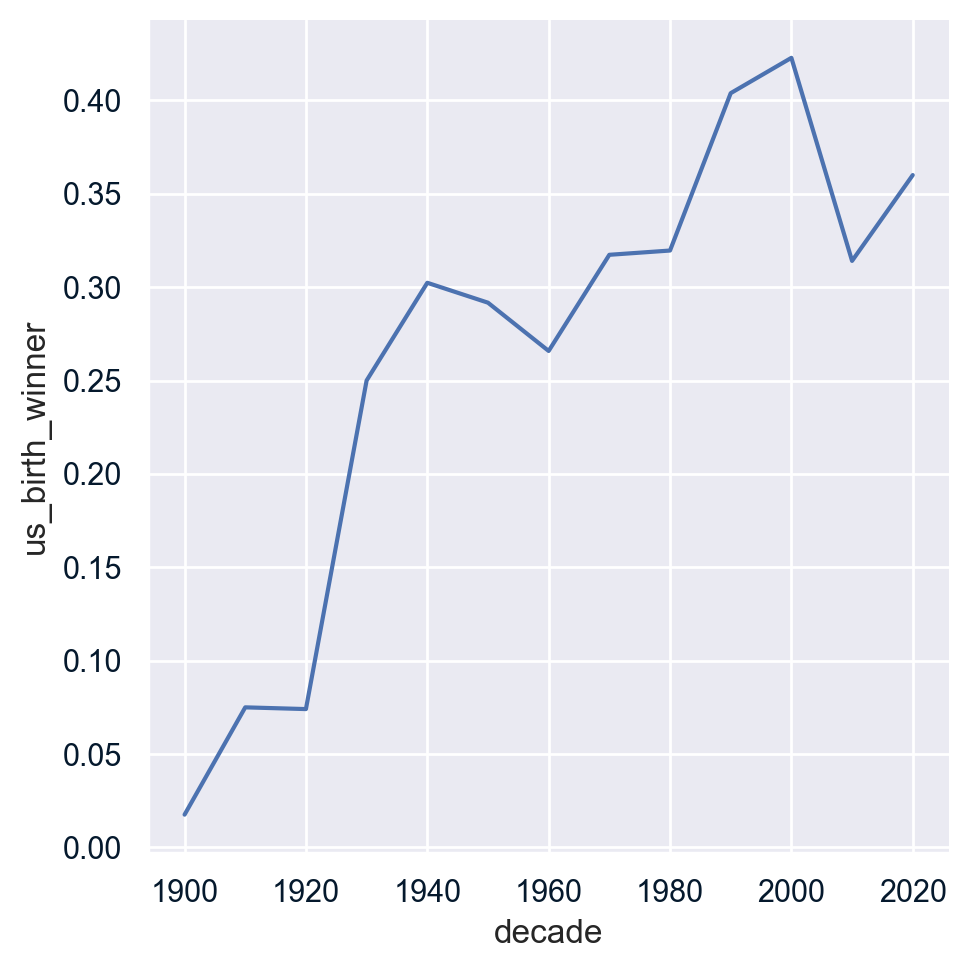

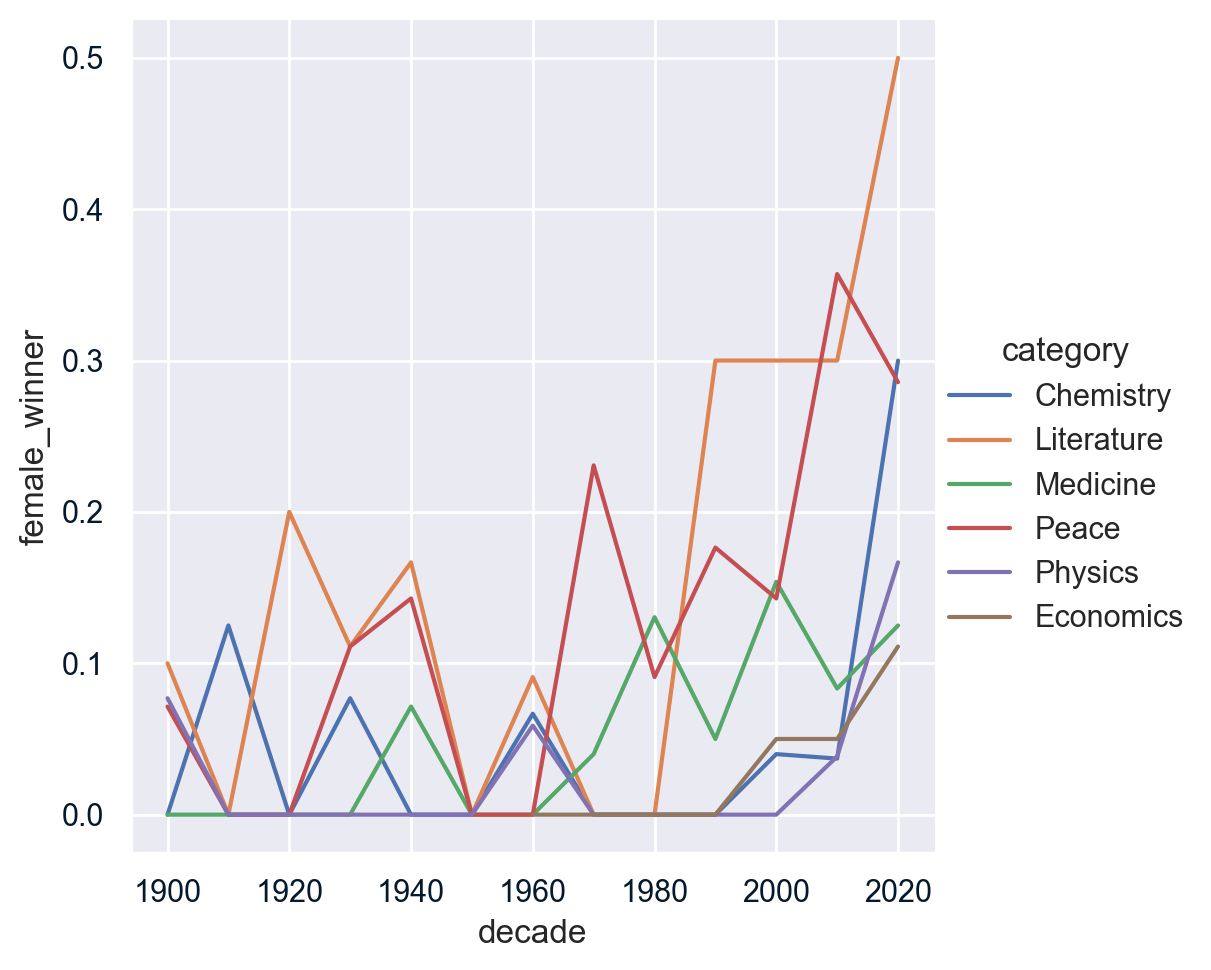

In [42]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Imported data set
nobel = pd.read_csv('data/nobel.csv')

# Identified the gender of majority of Nobel Prize winners
top_gender = nobel['sex'].value_counts().index[0]
print("The gender with the most Nobel Prize winners is: ", top_gender)

# Identified the birth country of majority of Nobel Prize winners
top_country = nobel['birth_country'].value_counts().index[0]
print("The most common birth country of Nobel Prize winners is: ", top_country)

# Created a column to specify winners from United States of America
nobel['us_birth_winner'] = nobel['birth_country'] == 'United States of America'

# Created a column to break out periods by decade
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)

# Calculated the mean values of US-born Nobel Prize winners for each decade
ratio_usa_winners = nobel.groupby(['decade'], as_index=False)['us_birth_winner'].mean()
max_decade_usa = ratio_usa_winners[ratio_usa_winners['us_birth_winner'] == ratio_usa_winners['us_birth_winner'].max()]['decade'].values[0]

# Visualized the dominance of the USA in a relational line plot
sns.set()
us_winners_plot = sns.relplot(x='decade', y='us_birth_winner', data=ratio_usa_winners, kind='line')

# Created a column to filter the data by female Nobel Prize winners
nobel['female_winner'] = nobel['sex'] == "Female"

# Calculated the mean values of female Nobel Prize winners
ratio_female_winner = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

# Selected the decade and category with the highest female winners
max_female_decade_category = ratio_female_winner[ratio_female_winner['female_winner'] == ratio_female_winner['female_winner'].max()][['decade', 'category']]

# Created a dictionary with the decade and category pair for each female Nobel Prize winner
max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}

# Visualized the female winners by decade on a line plot
female_winners_plot = sns.relplot(x='decade', y='female_winner', hue='category', data=ratio_female_winner, kind='line')

# Found the name of the first woman to win a Nobel Prize and the category in which they won
first_woman_df = nobel[nobel['female_winner']==True].nsmallest(1, 'year')
first_woman_name = first_woman_df['full_name'].min()
first_woman_category = first_woman_df['category'].min()
print("The first woman to win a Nobel Prize was ", first_woman_name)
print("She won in the category of ", first_woman_category)

# Filtered the data on Nobel Prize winners who have won 2 or more Prizes
repeat_counts = nobel['full_name'].value_counts()
repeat_winners = repeat_counts[repeat_counts >= 2].index
repeat_list = list(repeat_winners)
print("The repeat Nobel Prize winners are: ", repeat_list)